## Pattern Recognition
### Assignment 4  
#### Group 4:

- COE18B056 - Thigulla Vamsi Krishna
- COE18B065 - Srinivasan R Sharma
- CED18I039 - Paleti Krishnasai

**Q4.)
From the iris dataset, choose the ’petallength’, ’sepalwidth’ for setosa, versicolor and virginica flowers.  Learna decision boundary for the two features using asingle perceptron and SVM. Assume that all the weightsof the perceptron are initialized as 0 with the learning rate of 0.01.  Draw the decision boundary**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from cvxopt import matrix, solvers
from sympy import *

In [2]:
iris_dataset = pd.read_csv("Iris_dataset.csv",index_col=False)
print(iris_dataset.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [3]:
iris_data = iris_dataset.drop(['sepal.length','petal.width'], axis=1)
print(iris_data)

     sepal.width  petal.length    variety
0            3.5           1.4     Setosa
1            3.0           1.4     Setosa
2            3.2           1.3     Setosa
3            3.1           1.5     Setosa
4            3.6           1.4     Setosa
..           ...           ...        ...
145          3.0           5.2  Virginica
146          2.5           5.0  Virginica
147          3.0           5.2  Virginica
148          3.4           5.4  Virginica
149          3.0           5.1  Virginica

[150 rows x 3 columns]


In [4]:
iris_data_12 = iris_data[iris_data['variety']!='Virginica']
print(iris_data_12)

    sepal.width  petal.length     variety
0           3.5           1.4      Setosa
1           3.0           1.4      Setosa
2           3.2           1.3      Setosa
3           3.1           1.5      Setosa
4           3.6           1.4      Setosa
..          ...           ...         ...
95          3.0           4.2  Versicolor
96          2.9           4.2  Versicolor
97          2.9           4.3  Versicolor
98          2.5           3.0  Versicolor
99          2.8           4.1  Versicolor

[100 rows x 3 columns]


In [5]:
var=[]
for i in range(len(iris_data_12)):
    if iris_data_12['variety'].iloc[i]=='Setosa':
        var.append(1)
    else:
        var.append(-1)
iris_data_12['var'] = var
iris_data_12 = iris_data_12.drop(['variety'],axis=1)
print(iris_data_12)

    sepal.width  petal.length  var
0           3.5           1.4    1
1           3.0           1.4    1
2           3.2           1.3    1
3           3.1           1.5    1
4           3.6           1.4    1
..          ...           ...  ...
95          3.0           4.2   -1
96          2.9           4.2   -1
97          2.9           4.3   -1
98          2.5           3.0   -1
99          2.8           4.1   -1

[100 rows x 3 columns]


<ipython-input-5-72b04fa0b6fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_12['var'] = var


In [6]:
iris_data_13 = iris_data[iris_data['variety']!='Versicolor']
print(iris_data_13)

     sepal.width  petal.length    variety
0            3.5           1.4     Setosa
1            3.0           1.4     Setosa
2            3.2           1.3     Setosa
3            3.1           1.5     Setosa
4            3.6           1.4     Setosa
..           ...           ...        ...
145          3.0           5.2  Virginica
146          2.5           5.0  Virginica
147          3.0           5.2  Virginica
148          3.4           5.4  Virginica
149          3.0           5.1  Virginica

[100 rows x 3 columns]


In [7]:
var=[]
for i in range(len(iris_data_13)):
    if iris_data_13['variety'].iloc[i]=='Setosa':
        var.append(1)
    else:
        var.append(-1)
iris_data_13['var'] = var
iris_data_13 = iris_data_13.drop(['variety'],axis=1)
print(iris_data_13)

     sepal.width  petal.length  var
0            3.5           1.4    1
1            3.0           1.4    1
2            3.2           1.3    1
3            3.1           1.5    1
4            3.6           1.4    1
..           ...           ...  ...
145          3.0           5.2   -1
146          2.5           5.0   -1
147          3.0           5.2   -1
148          3.4           5.4   -1
149          3.0           5.1   -1

[100 rows x 3 columns]


<ipython-input-7-636e89629875>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_13['var'] = var


In [8]:
iris_data_23 = iris_data[iris_data['variety']!='Setosa']
print(iris_data_23)

     sepal.width  petal.length     variety
50           3.2           4.7  Versicolor
51           3.2           4.5  Versicolor
52           3.1           4.9  Versicolor
53           2.3           4.0  Versicolor
54           2.8           4.6  Versicolor
..           ...           ...         ...
145          3.0           5.2   Virginica
146          2.5           5.0   Virginica
147          3.0           5.2   Virginica
148          3.4           5.4   Virginica
149          3.0           5.1   Virginica

[100 rows x 3 columns]


In [9]:
var=[]
for i in range(len(iris_data_23)):
    if iris_data_23['variety'].iloc[i]=='Versicolor':
        var.append(1)
    else:
        var.append(-1)
iris_data_23['var'] = var
iris_data_23 = iris_data_23.drop(['variety'],axis=1)
print(iris_data_23)

     sepal.width  petal.length  var
50           3.2           4.7    1
51           3.2           4.5    1
52           3.1           4.9    1
53           2.3           4.0    1
54           2.8           4.6    1
..           ...           ...  ...
145          3.0           5.2   -1
146          2.5           5.0   -1
147          3.0           5.2   -1
148          3.4           5.4   -1
149          3.0           5.1   -1

[100 rows x 3 columns]


<ipython-input-9-0a34df3c1e97>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_23['var'] = var


####  Perceptron

In [10]:
data_aug_12 = pd.DataFrame(list(zip(iris_data_12['petal.length'],iris_data_12['sepal.width'], [1 for i in range(len(iris_data_12))],iris_data_12['var'])), columns=['petal.length','sepal.width','augment','var'])
print(data_aug_12)

    petal.length  sepal.width  augment  var
0            1.4          3.5        1    1
1            1.4          3.0        1    1
2            1.3          3.2        1    1
3            1.5          3.1        1    1
4            1.4          3.6        1    1
..           ...          ...      ...  ...
95           4.2          3.0        1   -1
96           4.2          2.9        1   -1
97           4.3          2.9        1   -1
98           3.0          2.5        1   -1
99           4.1          2.8        1   -1

[100 rows x 4 columns]


In [11]:
data_aug_13 = pd.DataFrame(list(zip(iris_data_13['petal.length'],iris_data_13['sepal.width'], [1 for i in range(len(iris_data_13))],iris_data_13['var'])), columns=['petal.length','sepal.width','augment','var'])
print(data_aug_13)

    petal.length  sepal.width  augment  var
0            1.4          3.5        1    1
1            1.4          3.0        1    1
2            1.3          3.2        1    1
3            1.5          3.1        1    1
4            1.4          3.6        1    1
..           ...          ...      ...  ...
95           5.2          3.0        1   -1
96           5.0          2.5        1   -1
97           5.2          3.0        1   -1
98           5.4          3.4        1   -1
99           5.1          3.0        1   -1

[100 rows x 4 columns]


In [12]:
data_aug_23 = pd.DataFrame(list(zip(iris_data_23['petal.length'],iris_data_23['sepal.width'], [1 for i in range(len(iris_data_23))],iris_data_23['var'])), columns=['petal.length','sepal.width','augment','var'])
print(data_aug_23)

    petal.length  sepal.width  augment  var
0            4.7          3.2        1    1
1            4.5          3.2        1    1
2            4.9          3.1        1    1
3            4.0          2.3        1    1
4            4.6          2.8        1    1
..           ...          ...      ...  ...
95           5.2          3.0        1   -1
96           5.0          2.5        1   -1
97           5.2          3.0        1   -1
98           5.4          3.4        1   -1
99           5.1          3.0        1   -1

[100 rows x 4 columns]


**Splitting Features and Labels**

In [13]:
def split(data_aug):
    data_up = data_aug.copy()
    for i in range(len(data_up)):
        if(data_up['var'][i] == 1):
            data_up['petal.length'][i] = - data_up['petal.length'][i]
            data_up['sepal.width'][i] = -data_up['sepal.width'][i]
            data_up['augment'][i] = -data_up['augment'][i]
    # print(data_up)
    data_up = data_up.drop(['var'], axis=1)
    data_up = np.array(data_up)
    # print(data_up)

    labels = data_aug['var']
    labels = np.array(labels)
    # print(labels)

    return (data_up, labels)

In [14]:
data_up_12, labels_12 = split(data_aug_12)
data_up_13, labels_13 = split(data_aug_13)
data_up_23, labels_23 = split(data_aug_23)


<ipython-input-13-e04cf10d8a68>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_up['petal.length'][i] = - data_up['petal.length'][i]
<ipython-input-13-e04cf10d8a68>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_up['sepal.width'][i] = -data_up['sepal.width'][i]
<ipython-input-13-e04cf10d8a68>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_up['augment'][i] = -data_up['augment'][i]


In [15]:
def Perceptron_Train(data_up, labels, eta):
    
    threshold = 5000
    A = np.zeros(len(data_up[0]))

    # print(A)

    for epoch in range(threshold):
        ctr = 0
    
        for inp, label in zip(data_up, labels):
            summation = np.dot(inp, A)
            if summation <= 0:
                A += eta*inp
                ctr = 0

            else:
                ctr+=1
            
        if ctr == len(data_up):     #Until all input is correctly classified
            break
    print(epoch)
    return A


In [16]:
x1, x2, b = symbols('x1 x2 1')
P = np.array([x1,x2, b])
print(P)

[x1 x2 1]


In [17]:
eta = 0.01
A_12 = Perceptron_Train(data_up_12, labels_12, eta)
print(A_12)

3
[ 0.052 -0.041 -0.01 ]


In [18]:
Percep_equation_12 = np.dot(A_12.T, P)
print("Decision Boundary between Setosa and Versicolor: ", Percep_equation_12, ' = 0')

Decision Boundary between Setosa and Versicolor:  -0.01*1 + 0.052*x1 - 0.041*x2  = 0


In [19]:
eta = 0.01
A_13 = Perceptron_Train(data_up_13, labels_13, eta)
print(A_13)

2
[ 0.032 -0.037 -0.01 ]


In [20]:
Percep_equation_13 = np.dot(A_13.T, P)
print("Decision Boundary between Setosa and Virginica: ", Percep_equation_13, ' = 0')

Decision Boundary between Setosa and Virginica:  -0.01*1 + 0.032*x1 - 0.037*x2  = 0


In [21]:
eta = 0.01
A_23 = Perceptron_Train(data_up_23, labels_23, eta)
print(A_23)

4999
[ 1.296 -0.837 -3.43 ]


In [22]:
Percep_equation_23 = np.dot(A_23.T, P)
print("Decision Boundary between Versicolor and Virginica: ", Percep_equation_23, ' = 0')

Decision Boundary between Versicolor and Virginica:  -3.42999999999997*1 + 1.29600000000016*x1 - 0.837*x2  = 0


Plotting the Decision Boundary

In [23]:
def plot_percep(A, data_aug):
    a = np.linspace(-1,7,100)
    b = -a*A[0]/A[1] - A[2]/A[1]

    sns.set(style="darkgrid")
    sns.lmplot(x='petal.length',y='sepal.width', data=data_aug, fit_reg=False, hue='var', legend=True)
    plt.plot(a,b)
    plt.show()

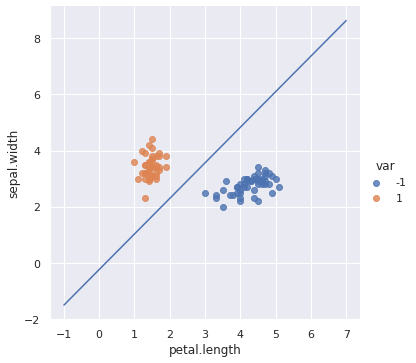

In [24]:
plot_percep(A_12,data_aug_12)

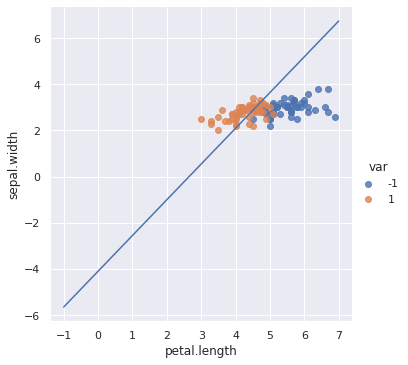

In [25]:
plot_percep(A_23,data_aug_23)

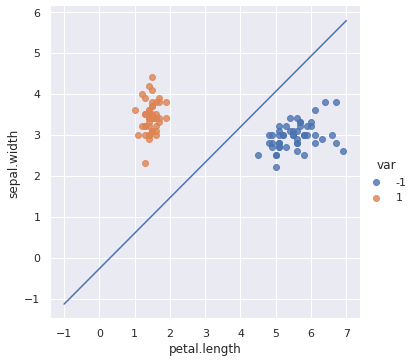

In [26]:
plot_percep(A_13, data_aug_13)

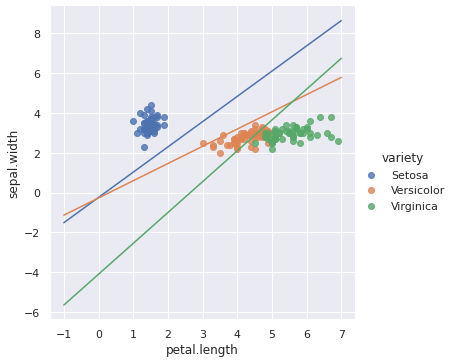

In [27]:
a = np.linspace(-1,7,100)
b_12 = -a*A_12[0]/A_12[1] - A_12[2]/A_12[1]
b_13 = -a*A_13[0]/A_13[1] - A_13[2]/A_13[1]
b_23 = -a*A_23[0]/A_23[1] - A_23[2]/A_23[1]
sns.set(style="darkgrid")
sns.lmplot(x='petal.length',y='sepal.width', data=iris_data, fit_reg=False, hue='variety', legend=True)
plt.plot(a,b_12)
plt.plot(a,b_13)
plt.plot(a,b_23)
plt.show()

####  SVM

In [28]:
def data_svm_split(iris):
    X = iris[['petal.length','sepal.width']]
    X = np.array(X)

    Y = iris['var']
    Y = np.array(Y).reshape(len(iris),1)

    return (X,Y)

In [29]:
X_12,Y_12 = data_svm_split(iris_data_12)
X_13,Y_13 = data_svm_split(iris_data_13)
X_23,Y_23 = data_svm_split(iris_data_23)

In [30]:
def SVM_Train(X,Y):
    m = len(X)
    P = matrix(np.multiply(np.dot(Y, Y.T), np.dot(X, X.T)))
    q = matrix(np.ones(m) * -1)
    g1 = np.asarray(np.diag(np.ones(m) * -1))
    
    print(np.array(g1).shape)
    h = matrix(np.zeros(m))
    A = np.reshape((Y.T), (1,m))
    b=[[0]]

    P = matrix(P,(m,m),'d') #dense
    A = matrix(A,(1,m),'d')
    g1 = matrix(g1,(m,m),'d')
    b = matrix(b,(1,1),'d')

    sol = solvers.qp(P, q, g1, h, A, b)
    alpha = np.array(sol['x'])
    ind = (alpha > 1e-4).flatten()
    print(ind)

    W = np.dot(np.transpose(alpha*Y),X)
    print(W)

    for i in range(m):
        if ind[i] == True:
            W0 = Y[i] - np.dot(X[i],W.T)
            print
            break

    print(W0)

    return (W, W0)

In [31]:
x1, x2 = symbols('x1 x2')
P_SVM = np.array([x1,x2])
print(P_SVM)

[x1 x2]


In [32]:
W_12,W0_12 = SVM_Train(X_12,Y_12)

(100, 100)
     pcost       dcost       gap    pres   dres
 0: -4.3867e+00 -8.1716e+00  3e+02  1e+01  2e+00
 1: -2.3798e+00 -2.5258e+00  2e+01  1e+00  2e-01
 2: -4.3479e-01 -1.7538e+00  2e+00  5e-02  6e-03
 3: -6.7595e-01 -1.0544e+00  5e-01  1e-02  1e-03
 4: -8.1435e-01 -1.1260e+00  4e-01  4e-03  5e-04
 5: -1.0085e+00 -1.0271e+00  2e-02  8e-05  1e-05
 6: -1.0251e+00 -1.0253e+00  2e-04  9e-07  1e-07
 7: -1.0253e+00 -1.0253e+00  2e-06  9e-09  1e-09
 8: -1.0253e+00 -1.0253e+00  2e-08  9e-11  1e-11
Optimal solution found.
[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False F

In [33]:
SVM_equation_12 = np.dot(W_12[0].T, P_SVM) + W0_12[0]
print("Decision Boundary between Setosa and Versicolor: ", SVM_equation_12, ' = 0')

Decision Boundary between Setosa and Versicolor:  -1.25714285940527*x1 + 0.685714284290053*x2 + 1.05714286628384  = 0


In [34]:
W_13,W0_13 = SVM_Train(X_13,Y_13)

(100, 100)
     pcost       dcost       gap    pres   dres
 0: -3.3137e+00 -4.9765e+00  2e+02  2e+01  1e+00
 1: -1.6126e-01 -8.1531e-01  1e+01  9e-01  8e-02
 2:  1.9106e-02 -6.5205e-01  9e-01  1e-02  1e-03
 3: -1.5487e-01 -2.7974e-01  1e-01  7e-04  6e-05
 4: -2.2572e-01 -2.8972e-01  6e-02  1e-04  1e-05
 5: -2.5983e-01 -2.6459e-01  5e-03  1e-05  8e-07
 6: -2.6415e-01 -2.6421e-01  5e-05  1e-07  9e-09
 7: -2.6420e-01 -2.6420e-01  5e-07  1e-09  9e-11
 8: -2.6420e-01 -2.6420e-01  5e-09  1e-11  9e-13
Optimal solution found.
[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False F

In [35]:
SVM_equation_13 = np.dot(W_13[0].T, P_SVM) + W0_13[0]
print("Decision Boundary between Setosa and Virginica: ", SVM_equation_13, ' = 0')

Decision Boundary between Setosa and Virginica:  -0.686922063593103*x1 + 0.237780707125038*x2 + 1.49669751660177  = 0


In [36]:
W_23,W0_23 = SVM_Train(X_23,Y_23)

(100, 100)
     pcost       dcost       gap    pres   dres
 0: -3.7394e+01 -8.7261e+01  5e+02  2e+01  2e+00
 1: -1.0739e+02 -1.7754e+02  3e+02  1e+01  2e+00
 2: -5.7593e+02 -8.7585e+02  4e+02  1e+01  2e+00
 3: -1.9989e+03 -2.2838e+03  3e+02  1e+01  1e+00
 4: -6.2946e+03 -6.9640e+03  7e+02  1e+01  1e+00
 5: -3.5722e+04 -3.7828e+04  2e+03  1e+01  1e+00
 6: -1.6095e+05 -1.6859e+05  8e+03  1e+01  1e+00
 7: -2.7868e+06 -2.8212e+06  3e+04  9e+00  1e+00
 8: -1.2159e+08 -1.2231e+08  7e+05  9e+00  1e+00
 9: -1.9001e+10 -1.9011e+10  1e+07  9e+00  1e+00
10: -1.9282e+10 -1.9292e+10  1e+07  9e+00  1e+00
11: -1.9287e+10 -1.9297e+10  1e+07  9e+00  1e+00
12: -2.2196e+10 -2.2207e+10  1e+07  9e+00  1e+00
13: -3.9214e+10 -3.9235e+10  2e+07  9e+00  1e+00
14: -7.6312e+10 -7.6348e+10  4e+07  9e+00  1e+00
15: -9.6129e+10 -9.6168e+10  4e+07  9e+00  1e+00
Terminated (singular KKT matrix).
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  

In [37]:
SVM_equation_23 = np.dot(W_23[0].T, P_SVM) + W0_23[0]
print("Decision Boundary between Versicolor and Virginica: ", SVM_equation_23, ' = 0')

Decision Boundary between Versicolor and Virginica:  1.00009765625 - 3.0517578125e-5*x2  = 0


In [38]:
def plot_SVM(W,W0, data_aug):
    a = np.linspace(-1,7,100)
    b = -a*W[0][0]/W[0][1] - W0[0]/W[0][1]
    sns.set(style="darkgrid")
    sns.lmplot(x='petal.length',y='sepal.width', data=data_aug, fit_reg=False, hue='var', legend=True)
    plt.plot(a,b)
    plt.show()

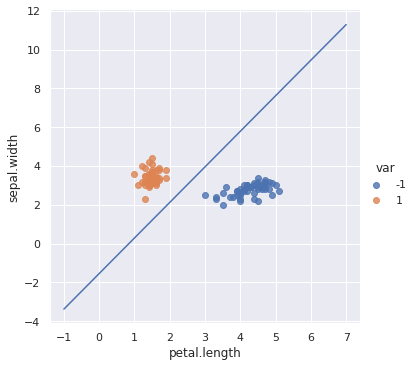

In [39]:
plot_SVM(W_12,W0_12,iris_data_12)

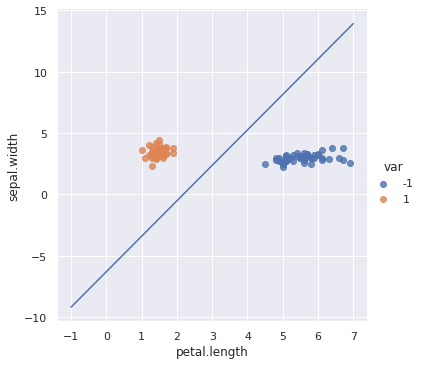

In [40]:
plot_SVM(W_13,W0_13,iris_data_13)

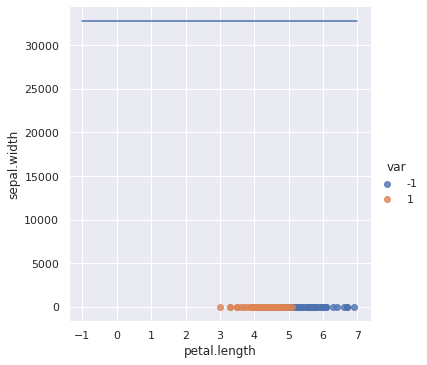

In [41]:
plot_SVM(W_23,W0_23,iris_data_23)

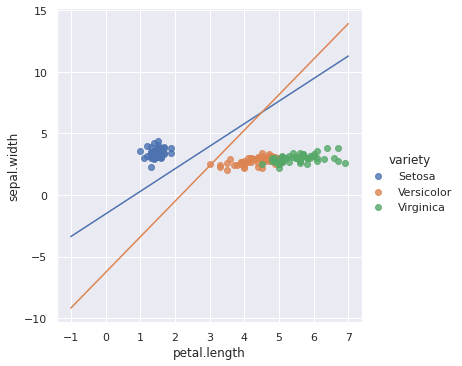

In [42]:
a = np.linspace(-1,7,100)
b_12 = -a*W_12[0][0]/W_12[0][1] - W0_12[0]/W_12[0][1]
b_13 = -a*W_13[0][0]/W_13[0][1] - W0_13[0]/W_13[0][1]
sns.set(style="darkgrid")
sns.lmplot(x='petal.length',y='sepal.width', data=iris_data, fit_reg=False, hue='variety', legend=True)

plt.plot(a,b_12)
plt.plot(a,b_13)
plt.show()

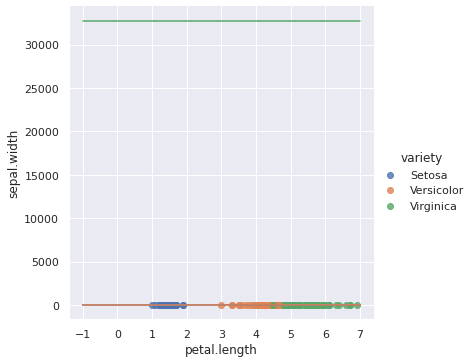

In [43]:
a = np.linspace(-1,7,100)
b_12 = -a*W_12[0][0]/W_12[0][1] - W0_12[0]/W_12[0][1]
b_13 = -a*W_13[0][0]/W_13[0][1] - W0_13[0]/W_13[0][1]
b_23 = -a*W_23[0][0]/W_23[0][1] - W0_23[0]/W_23[0][1]
sns.set(style="darkgrid")
sns.lmplot(x='petal.length',y='sepal.width', data=iris_data, fit_reg=False, hue='variety', legend=True)
plt.plot(a,b_12)
plt.plot(a,b_13)
plt.plot(a,b_23)
plt.show()